In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from pydataset import data

from env import get_connection


In [79]:
url = get_connection('titanic_db')

In [80]:
query = 'select * from passengers'

In [81]:
titanic = pd.read_sql(query, url)
titanic.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1


In [82]:
cols_to_drop = ['passenger_id', 'age','embarked', 'class', 'deck']

titanic.drop(columns= cols_to_drop, inplace=True)


In [83]:
titanic.head()

,survived,pclass,sex,sibsp,parch,fare,embark_town,alone
0,0,3,male,1,0,7.2500,Southampton,0
1,1,1,female,1,0,71.2833,Cherbourg,0
2,1,3,female,0,0,7.9250,Southampton,1
3,1,1,female,1,0,53.1000,Southampton,0
4,0,3,male,0,0,8.0500,Southampton,1


In [84]:
titanic['embark_town'].fillna('Southampton', inplace=True) #fills embark_town nulls with southampton
titanic.isna().sum()

survived       0
pclass         0
sex            0
sibsp          0
parch          0
fare           0
embark_town    0
alone          0
dtype: int64

In [85]:
dummies = pd.get_dummies(titanic[['sex','embark_town',]], drop_first=True)
dummies

,sex_male,embark_town_Queenstown,embark_town_Southampton
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1
...,...,...,...
886,1,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [86]:
titanic = pd.concat([titanic, dummies], axis = 1)
titanic.head()

,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,3,male,1,0,7.2500,Southampton,0,1,0,1
1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0
2,1,3,female,0,0,7.9250,Southampton,1,0,0,1
3,1,1,female,1,0,53.1000,Southampton,0,0,0,1
4,0,3,male,0,0,8.0500,Southampton,1,1,0,1


What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

- baseline is not survived
- 62% accuracy

In [87]:
titanic.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

In [88]:
print(f"Baseline accuracy: {round(549 / (549 + 342),2)}")

Baseline accuracy: 0.62


In [89]:
titanic.head()

,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,3,male,1,0,7.2500,Southampton,0,1,0,1
1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0
2,1,3,female,0,0,7.9250,Southampton,1,0,0,1
3,1,1,female,1,0,53.1000,Southampton,0,0,0,1
4,0,3,male,0,0,8.0500,Southampton,1,1,0,1


In [90]:
def train_val_test(df, target, seed=42):
    
    train, val_test = train_test_split(df, train_size=0.7, random_state=seed, stratify=df[target])
    
    val, test = train_test_split(val_test, train_size=0.5, random_state=seed, stratify=val_test[target])
    
    return train, val, test

In [91]:
train, val, test = train_val_test(titanic, 'survived')

train.shape, val.shape, test.shape

((623, 11), (134, 11), (134, 11))

In [92]:
X_train = train.drop(columns=['survived', 'sex', 'embark_town'])
y_train = train.survived

X_val = val.drop(columns=['survived', 'sex', 'embark_town'])
y_val = val.survived

X_test = test.drop(columns=['survived', 'sex', 'embark_town'])
y_test = test.survived

Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [93]:
seed = 42
clf = DecisionTreeClassifier(max_depth=3, random_state=42)

In [94]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [95]:
clf.score(X_train, y_train)

0.812199036918138

In [96]:
y_predictions = clf.predict(X_train)


In [97]:
# class_names = np.array(clf.classes_).astype('str').tolist()

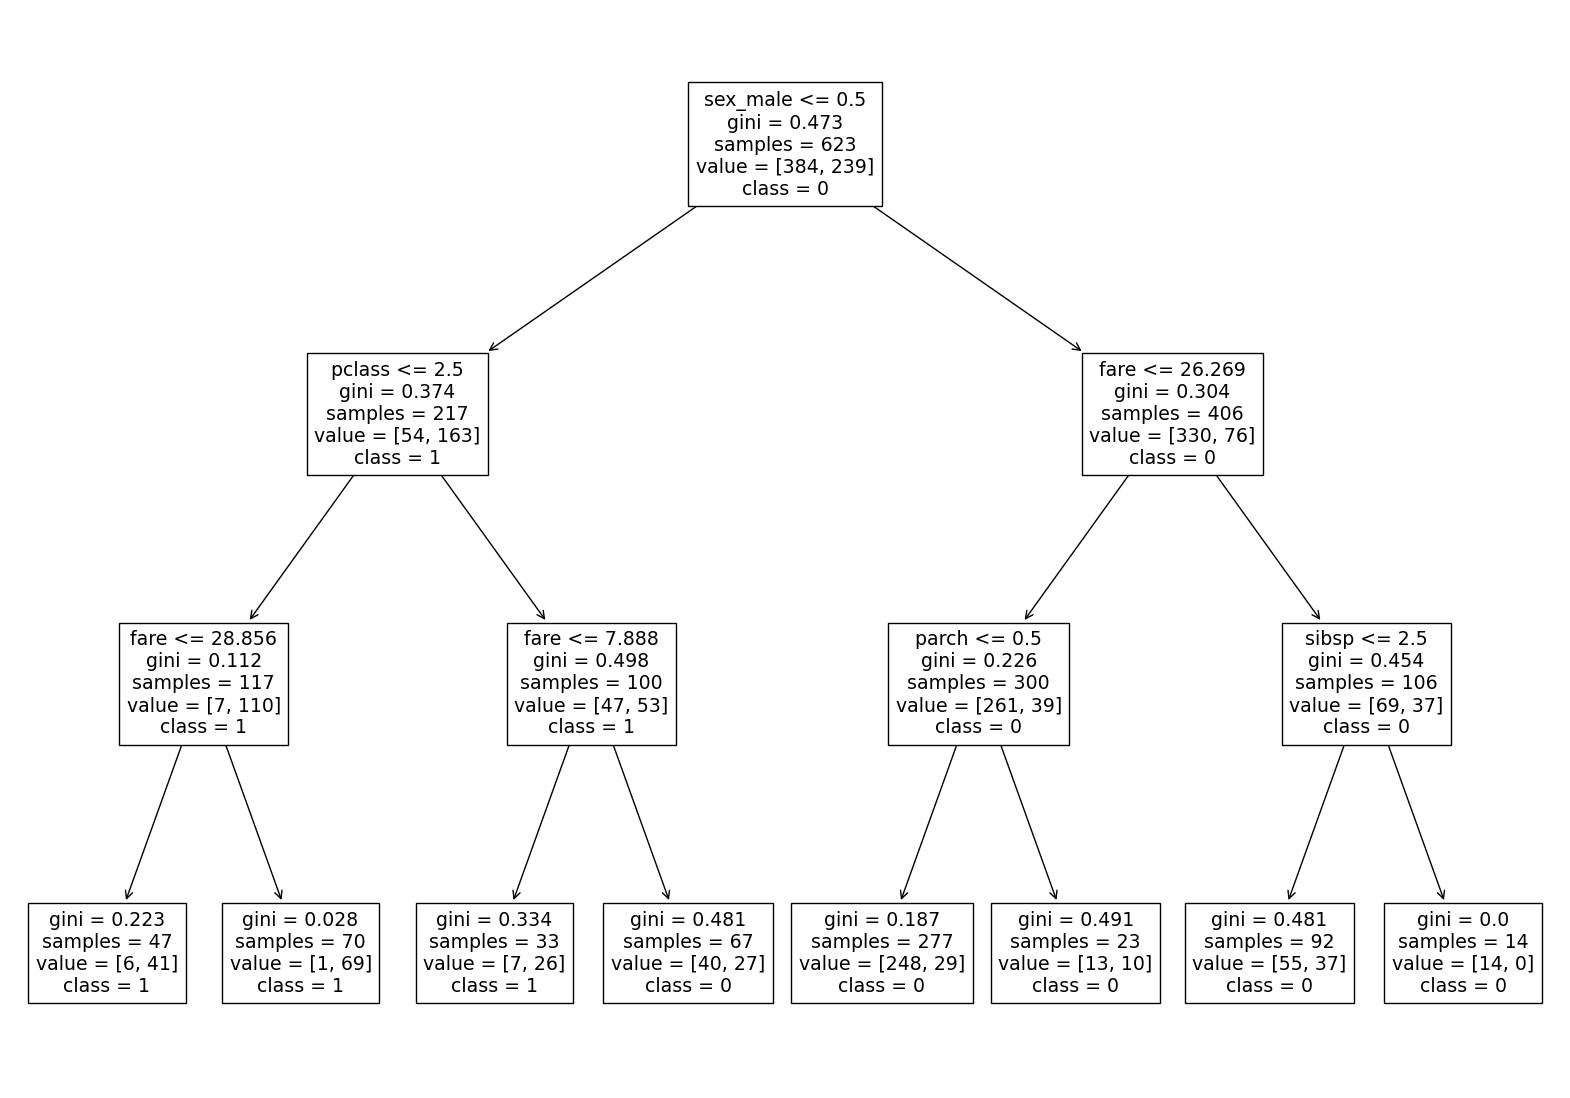

In [98]:
plt.figure(figsize=(20,14))

plot_tree(clf, feature_names=X_train.columns, class_names=['0','1'])

plt.show()

Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [99]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.81


/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


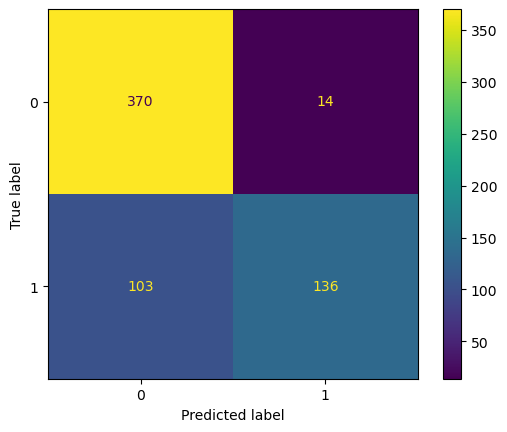

In [100]:
plot_confusion_matrix(clf, X_train, y_train)

In [101]:
print(classification_report(y_train, y_predictions))

              precision    recall  f1-score   support

           0       0.78      0.96      0.86       384
           1       0.91      0.57      0.70       239

    accuracy                           0.81       623
   macro avg       0.84      0.77      0.78       623
weighted avg       0.83      0.81      0.80       623



In [103]:
print("Classification Report")
pd.DataFrame(classification_report(y_train, y_predictions, output_dict=True))

Classification Report


,0,1,accuracy,macro avg,weighted avg
precision,0.782241,0.906667,0.812199,0.844454,0.829974
recall,0.963542,0.569038,0.812199,0.766290,0.812199
f1-score,0.863477,0.699229,0.812199,0.781353,0.800467
support,384.000000,239.000000,0.812199,623.000000,623.000000


Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [104]:
TN, FP, FN, TP = confusion_matrix(y_train, y_predictions).ravel()

In [105]:
TN, FP, FN, TP

(370, 14, 103, 136)

In [106]:
ALL = TP + FP + FN + TN

accuracy = (TP + TN)/ALL
true_positive_rate = recall = TP/(TP+FN)
false_positive_rate = FP/(FP+TN)
true_negative_rate = TN/(TN+FP)
false_negative_rate =  FN/(FN+TP)
precision = TP/(TP+FP)
f1_score = 2*(precision*recall)/(precision+recall)
support_pos = TP + FN
support_neg = FP + TN

print(f"Accuracy: {accuracy}", '\n')
print(f"True Positive Rate/Recall: {true_positive_rate}", '\n')
print(f"False Positive Rate: {false_positive_rate}", '\n')
print(f"True Negative Rate: {true_negative_rate}", '\n')
print(f"False Negative Rate: {false_negative_rate}", '\n')
print(f"Precision: {precision}", '\n')
print(f"F1 Score: {f1_score}", '\n')
print(f"Support (0): {support_neg}", '\n')
print(f"Support (1): {support_pos}")

Accuracy: 0.812199036918138 

True Positive Rate/Recall: 0.5690376569037657 

False Positive Rate: 0.036458333333333336 

True Negative Rate: 0.9635416666666666 

False Negative Rate: 0.4309623430962343 

Precision: 0.9066666666666666 

F1 Score: 0.699228791773779 

Support (0): 384 

Support (1): 239


Run through steps 2-4 using a different max_depth value.

In [107]:
for i in range(1, 25):
    
    big_max = DecisionTreeClassifier(max_depth=i, random_state=123)

    big_max = big_max.fit(X_train, y_train)

    y_predictions = big_max.predict(X_train)

    report = classification_report(y_train, y_predictions, output_dict=True)
    print(f"Tree with max depth of {i}")
    print(pd.DataFrame(report))
    print()

Tree with max depth of 1
                    0           1  accuracy   macro avg  weighted avg
precision    0.812808    0.751152  0.791332    0.781980      0.789155
recall       0.859375    0.682008  0.791332    0.770692      0.791332
f1-score     0.835443    0.714912  0.791332    0.775178      0.789204
support    384.000000  239.000000  0.791332  623.000000    623.000000

Tree with max depth of 2
                    0           1  accuracy   macro avg  weighted avg
precision    0.812808    0.751152  0.791332    0.781980      0.789155
recall       0.859375    0.682008  0.791332    0.770692      0.791332
f1-score     0.835443    0.714912  0.791332    0.775178      0.789204
support    384.000000  239.000000  0.791332  623.000000    623.000000

Tree with max depth of 3
                    0           1  accuracy   macro avg  weighted avg
precision    0.782241    0.906667  0.812199    0.844454      0.829974
recall       0.963542    0.569038  0.812199    0.766290      0.812199
f1-score     

In [108]:
metrics = []

for i in range(1,25):
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)
    tree = tree.fit(X_train, y_train)
    in_sample_accuracy = tree.score(X_train, y_train)
    out_of_sample_accuracy = tree.score(X_val, y_val)
    
    output= {'max_depth': i, 'train_accuracy': in_sample_accuracy, 'validate_accuracy': out_of_sample_accuracy}
    
    metrics.append(output)
    
df= pd.DataFrame(metrics)
df['difference'] = df.train_accuracy - df.validate_accuracy
df

,max_depth,train_accuracy,validate_accuracy,difference
0,1,0.791332,0.813433,-0.022101
1,2,0.791332,0.813433,-0.022101
2,3,0.812199,0.828358,-0.016159
3,4,0.825040,0.813433,0.011607
4,5,0.834671,0.820896,0.013775
5,6,0.850722,0.820896,0.029827
6,7,0.871589,0.813433,0.058156
7,8,0.871589,0.820896,0.050694
8,9,0.889246,0.805970,0.083275
9,10,0.895666,0.820896,0.074771


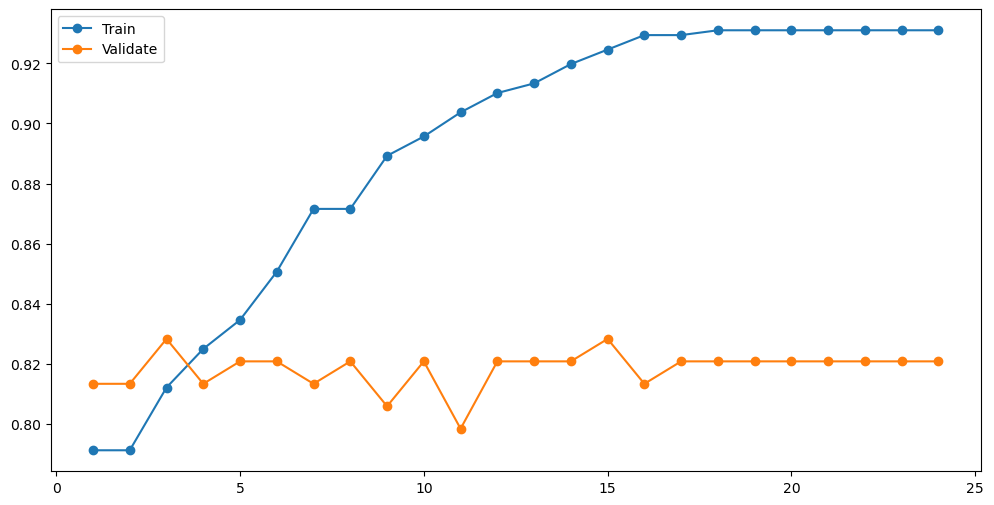

In [109]:
plt.figure(figsize=(12,6))
plt.plot(df.max_depth, df.train_accuracy, marker='o', label='Train')
plt.plot(df.max_depth, df.validate_accuracy, marker='o', label='Validate')
plt.legend()
plt.show()

In [110]:
df[df.difference <= 0.10].sort_values(by=['validate_accuracy', 'difference'], ascending = [False,True])

,max_depth,train_accuracy,validate_accuracy,difference
2,3,0.812199,0.828358,-0.016159
14,15,0.924559,0.828358,0.096200
4,5,0.834671,0.820896,0.013775
5,6,0.850722,0.820896,0.029827
7,8,0.871589,0.820896,0.050694
9,10,0.895666,0.820896,0.074771
11,12,0.910112,0.820896,0.089217
12,13,0.913323,0.820896,0.092427
13,14,0.919743,0.820896,0.098848
0,1,0.791332,0.813433,-0.022101


Work through these same exercises using the Telco dataset.  
Experiment with this model on other datasets with a higher number of output classes.



In [30]:
url = get_connection('telco_churn')

In [31]:
query = """
                select * from customers
                join contract_types using (contract_type_id)
                join internet_service_types using (internet_service_type_id)
                join payment_types using (payment_type_id)
                """


In [32]:
telco = pd.read_sql(query, url)
telco.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [33]:
telco.drop(columns=['payment_type_id', 'internet_service_type_id', 'contract_type_id', 'customer_id'], inplace=True)

In [34]:
telco['total_charges'] = telco['total_charges'].str.strip()


In [35]:
telco = telco[telco.total_charges != '']

In [36]:
telco['total_charges'] = telco.total_charges.astype(float)

In [37]:
telco['gender_encoded'] = telco.gender.map({'Female': 1, 'Male': 0})
telco['partner_encoded'] = telco.partner.map({'Yes': 1, 'No': 0})
telco['dependents_encoded'] = telco.dependents.map({'Yes': 1, 'No': 0})
telco['phone_service_encoded'] = telco.phone_service.map({'Yes': 1, 'No': 0})
telco['paperless_billing_encoded'] = telco.paperless_billing.map({'Yes': 1, 'No': 0})
telco['churn_encoded'] = telco.churn.map({'Yes': 1, 'No': 0})

In [38]:
dummy_df = pd.get_dummies(telco[['gender','multiple_lines', \
                              'online_security', \
                              'online_backup', \
                              'device_protection', \
                              'tech_support', \
                              'streaming_tv', \
                              'streaming_movies', \
                              'contract_type', \
                              'internet_service_type', \
                              'payment_type']], dummy_na=False, \
                              drop_first=True)

In [39]:
telco = pd.concat([telco, dummy_df], axis=1)

In [40]:
telco

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,...,1,0,0,1,0,0,0,0,0,1
1,Male,0,No,No,9,Yes,Yes,No,No,No,...,0,0,1,0,0,0,0,0,0,1
2,Male,0,No,No,4,Yes,No,No,No,Yes,...,0,0,0,0,0,1,0,0,1,0
3,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,...,1,0,1,0,0,1,0,0,1,0
4,Female,1,Yes,No,3,Yes,No,No,No,No,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,0,No,No,13,Yes,No,Yes,No,No,...,0,0,0,1,0,0,0,0,0,1
7039,Male,0,Yes,No,22,Yes,Yes,No,No,No,...,0,0,1,0,0,1,0,0,1,0
7040,Male,0,No,No,2,Yes,No,No,Yes,No,...,0,0,0,0,0,0,0,0,0,1
7041,Male,0,Yes,Yes,67,Yes,No,Yes,No,Yes,...,0,0,1,0,1,0,0,0,0,1


In [41]:
telco = telco.drop(columns=['gender', 'partner', 'dependents', 
                   'phone_service', 'multiple_lines',
                   'online_security', 'online_backup',
                   'device_protection'])

In [42]:
telco = telco.drop(columns=['tech_support', 'streaming_tv', 'streaming_movies', 
                   'paperless_billing'])


In [43]:
telco = telco.drop(columns=['contract_type', 'churn'])

In [44]:
telco = telco.drop(columns=['internet_service_type', 'payment_type'])

In [45]:
telco

,senior_citizen,tenure,monthly_charges,total_charges,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,churn_encoded,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0,9,65.60,593.30,1,1,1,1,1,0,...,1,0,0,1,0,0,0,0,0,1
1,0,9,59.90,542.40,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0,4,73.90,280.85,0,0,0,1,1,1,...,0,0,0,0,0,1,0,0,1,0
3,1,13,98.00,1237.85,0,1,0,1,1,1,...,1,0,1,0,0,1,0,0,1,0
4,1,3,83.90,267.40,1,1,0,1,1,1,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,13,55.15,742.90,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
7039,0,22,85.10,1873.70,0,1,0,1,1,1,...,0,0,1,0,0,1,0,0,1,0
7040,0,2,50.30,92.75,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
7041,0,67,67.85,4627.65,0,1,1,1,0,0,...,0,0,1,0,1,0,0,0,0,1


In [46]:
def train_val_test(df, target, seed=42):
    
    train, val_test = train_test_split(df, train_size=0.7, random_state=seed, stratify=df[target])
    
    val, test = train_test_split(val_test, train_size=0.5, random_state=seed, stratify=val_test[target])
    
    return train, val, test

In [47]:
train, val, test = train_val_test(telco, 'churn_encoded')

train.shape, val.shape, test.shape

((4922, 32), (1055, 32), (1055, 32))

In [48]:
X_train = train.drop(columns='churn_encoded')
y_train = train['churn_encoded']

X_val = train.drop(columns='churn_encoded')
y_val = train['churn_encoded']

X_test = train.drop(columns='churn_encoded')
y_test = train['churn_encoded']


In [49]:
seed = 42
clf = DecisionTreeClassifier(max_depth=3, random_state=42)

In [50]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [51]:
clf.score(X_train, y_train)

0.7911418122714344

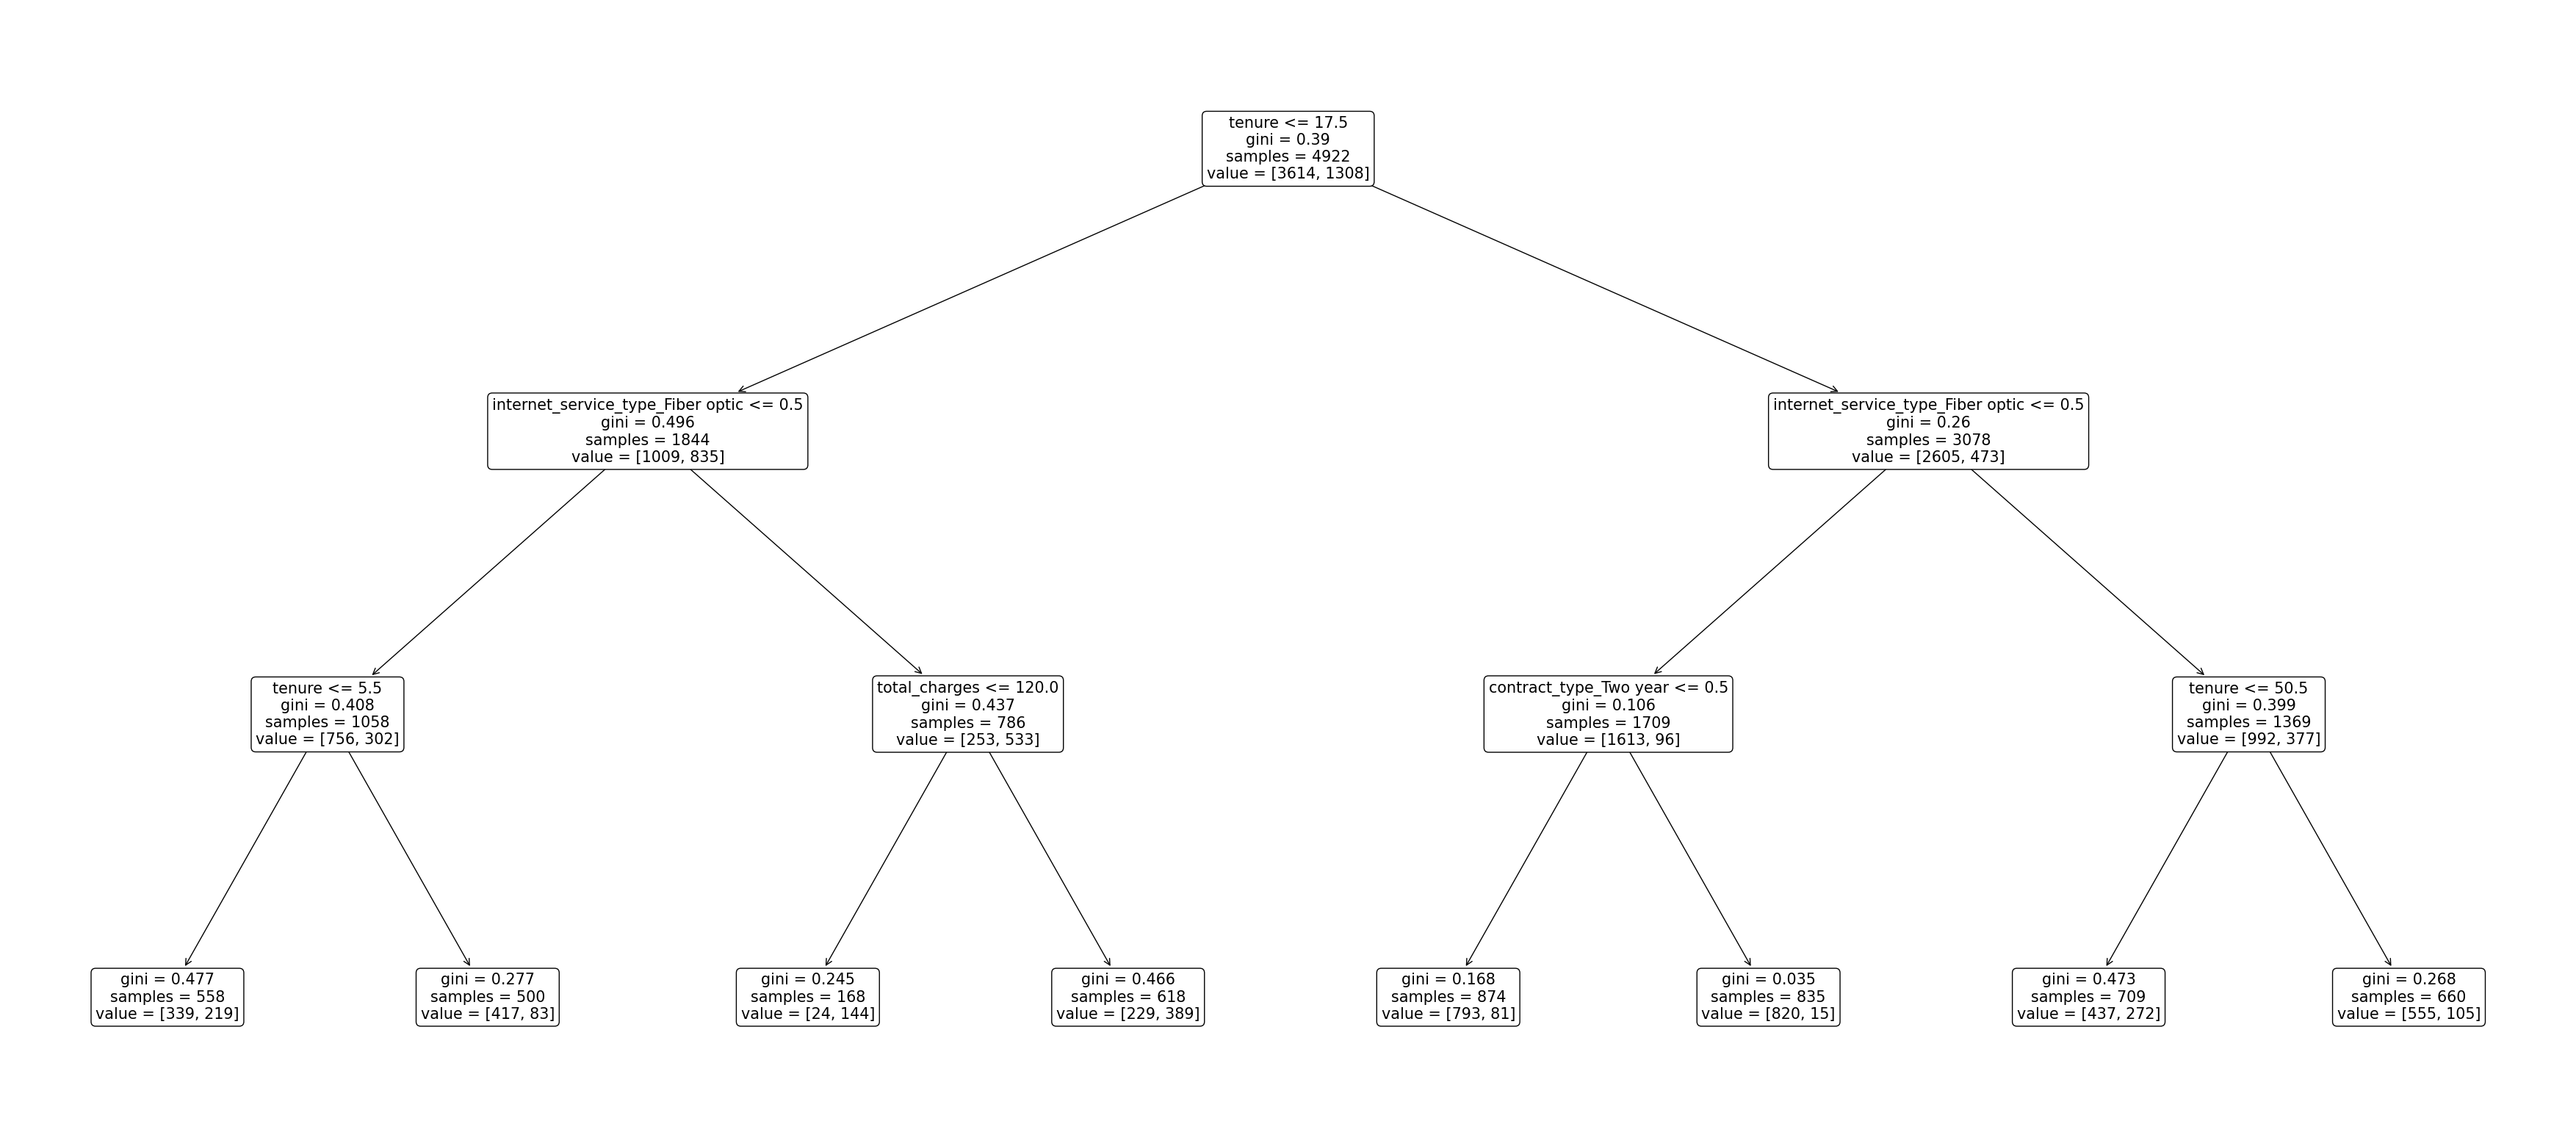

In [52]:
plt.figure(figsize=(45,20))

plot_tree(clf, feature_names=X_train.columns, rounded=True)

plt.show()